In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import random
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf
from sympy import solve, symbols
%matplotlib inline

# Bivariate Analysis

Evaluate **"association"** among variables.

- For categorical and discrete numberical data, we use Chi-squared Statistic or Cramer's V. 
- For continuous numerical data, draw scatter plot, if linear, use correlation coefficient. 
- For continuous numerical data, draw scatter plot, if nonlinear, discretize it and use Chi-squared Statistic or Cramer's V, or make a nonlinear function of x (mostly used: $y=x^2$)

## Categorical and Discrete Numerical Data

Cramer's V ($V$): for Standardized Chi-square($\chi^2$)
$$
V=\sqrt{\frac{\chi^2}{n\times min(r-1,c-1)}}
$$
- r: number of rows
- c: number of columns
- n: sample size

Cramer's V takes value between 0 and 1.

|Republican|Democrat|Totals
--|--|--
M|||358
F|||83
Totals|234|207|441

In [2]:
cat_data=np.array([[215,143],[19,64]])
chi2= chi2_contingency(cat_data)
print "The Chi-square statistic is",chi2[0]

The Chi-square statistic is 35.8877686481


In [3]:
url="http://pythontrade.com/public/Data/Model1.csv"
data1=pd.read_csv(url, index_col=0)
print data1.head()
print data1.shape

   x_0  x_1  x_2  x_3  x_4  x_5  x_6  x_7  x_8  x_9  y
0    1    0    0    0    0    1    1    0    0    0  0
1    0    1    0    0    0    1    0    0    0    0  0
2    0    0    1    0    0    0    1    1    0    0  0
3    0    0    1    0    0    0    0    1    0    0  0
4    1    0    0    1    0    1    1    1    0    1  1
(10000, 11)


From x_0 to x_9 respectively:
The Cramér's V is 0.250345331266
The Cramér's V is 0.26126524509
The Cramér's V is 0.00558604567444
The Cramér's V is 0.0132480977233
The Cramér's V is 0.00405932542895
The Cramér's V is 0.00125829104354
The Cramér's V is 0.012954801188
The Cramér's V is 0.261514980383
The Cramér's V is 0.444164162539
The Cramér's V is 0.509137301177


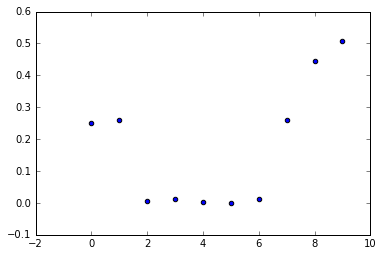

In [4]:
listV=[]
print 'From x_0 to x_9 respectively:'
for i in range(10):
    table=pd.crosstab(data1['x_'+str(i)],data1.y)
    V=np.sqrt(chi2_contingency(table)[0]/10000*1)
    print "The Cramér's V is",V
    listV.append(V)
plt.scatter(range(10),listV)

From the Cramer's Vs and the scatter plot, we can see that:</p>
**x_9 and x_8** has high association with y from data1.

## Continuous Numerical Data

### Correlation Coefficient 

$$Population:~\rho (X,Y)=\frac{Cov(X,Y)}{\sigma_X\sigma_Y}$$

$$sample:~r(X,Y)=\frac{cov(x,y)}{s_xs_y}$$

- $Cov=0$, there is no association
- $Cov >0$, there is positive association
- $Cov <0$, there is negative association
- $Cov$ cannot measure the strength of association (because it may not be linear) (It's still a good evaluation of linear association)

### When association is linear:

In [5]:
url='http://ihome.ust.hk/~imwan/index_files/data/tips.csv'
df_tips=pd.DataFrame.from_csv(url,index_col=None)
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


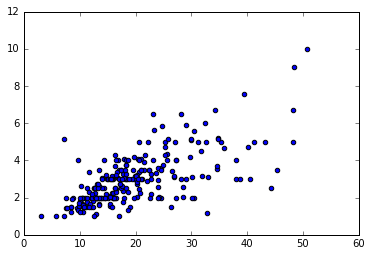

In [6]:
plt.scatter(df_tips['total_bill'],df_tips["tip"])

**It's linear, so we can use correlation coeffcient.**

In [7]:
corr=np.corrcoef(df_tips['total_bill'],df_tips["tip"],ddof=1)
print corr[0,1]

0.675734109211


### When association is not linear:

In [8]:
url='http://www.pythontrade.com/public/Data/practicefinaldata.csv'
data2_=pd.DataFrame.from_csv(url)
data2=data2_.drop('X2',axis=1)
data2.columns=['X1','X2','X3','X4','Y']
print data2.shape
print data2.head()

(2000, 5)
         X1        X2        X3        X4          Y
0 -3.954581  0.049043  1.717789 -0.718955  31.439314
1  1.403406 -0.996730 -3.288429  2.608641  27.486304
2  2.812903  0.839702  1.094371  2.129699  -2.938228
3  2.718921 -0.621399 -0.397449  3.179574  82.192689
4  0.141344 -0.863031  4.624856 -2.780806  67.865696


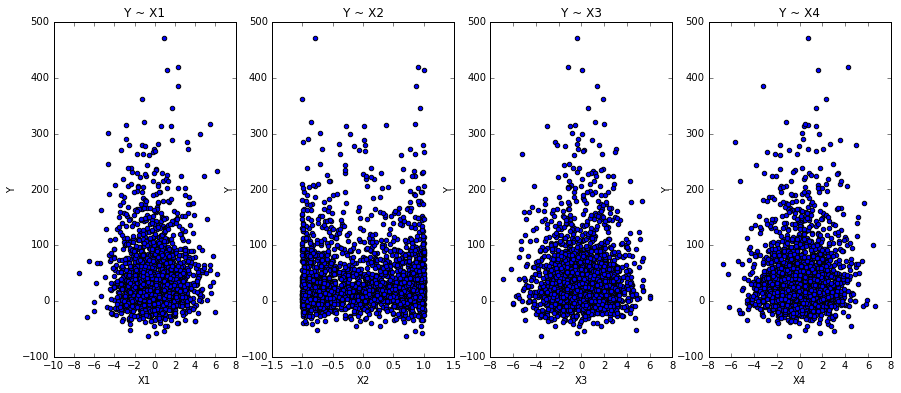

In [9]:
plt.figure(figsize=[15,6])
for i in range(4):
    plt.subplot(1,4,i+1,title='Y ~ '+list(data2)[i],xlabel=list(data2)[i],ylabel='Y') #list(data2)=list(data2.columns.values)=data2.columns.values.tolist（）
    plt.scatter(data2[list(data2)[i]],data2.Y)

**It's not linear, so we should discretize it and use Cramer's V.**

In [10]:
V=[]
Y01=pd.Series(np.ones(len(data2['Y'])))
Y01[data2["Y"]<=data2["Y"].mean()]=0 # Discretize by >mean or not
for i in range(1,5):
    X01=pd.Series(np.ones(len(data2['X'+str(i)])))
    X01[data2['X'+str(i)]<=data2['X'+str(i)].mean()]=0 # Discretize by >mean or not
    XYtable=pd.crosstab(X01,Y01)
    V.append(np.sqrt(chi2_contingency(XYtable)[0]/2000*1))
V_table=pd.DataFrame(V,list(data2)[:4],columns=['Cramer\'s V'])
print V_table
print 'The best feature is',V_table['Cramer\'s V'].idxmax()

    Cramer's V
X1    0.022088
X2    0.010512
X3    0.011334
X4    0.030490
The best feature is X4
